In [20]:
#split text into sentences based on punctuation marks or conjunction - NLTK
import nltk
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#ensure NLTK resources are download
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

#Sentiment Analysis - logic regression model
#TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to classify the sentiment of
#utterances as positive or negative

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#customer review
review = "The laptop is fast and efficient, but the battery life is terrible. I like the design but it is too heavy to carry around"

#Step1: split the text using punctuation and conjunction
#using regulars expression to split on punctuation and some common conjunction
utterances = re.split(r'[.,;!?]|\b(?:but|and)\b', review)

#clean up any white spaces or extra spaces
utterances = [utterance.strip() for utterance in utterances if utterance.split()]

#display utterances
utterances

#Step2: Display each utterance
for i, utterance in enumerate(utterances, 1):
    print(f"Utterance {i}: {utterance}")

Utterance 1: The laptop is fast
Utterance 2: efficient
Utterance 3: the battery life is terrible
Utterance 4: I like the design
Utterance 5: it is too heavy to carry around


In [16]:
#Step3: preprocess
#function for preprocessing
def preprocess_utterance(utterance):
    #tokenize the utterance
    tokens = word_tokenize(utterance.lower())

    #remove stopwords and keep alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return tokens

#apply preprocessing to each utterance
processed_utterance = [preprocess_utterance(utterance) for utterance in utterances]

#display the processed utterances
processed_utterance

[['laptop', 'fast'],
 ['efficient'],
 ['battery', 'life', 'terrible'],
 ['like', 'design'],
 ['heavy', 'carry', 'around']]

Accuracy : 1.00
Sentiment Predictions:  [1 0 1 1]


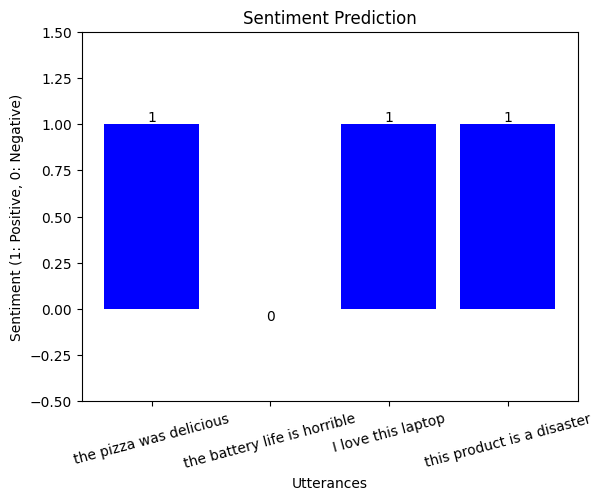

In [24]:
#sample data
data = {
    "utterances": ["The laptop is fast", "and efficient", "but the battery life is terrible",
                   "I like the design", "but it is too heavy to carry around"],
    #1: Positive, 0:Negative
    "sentiment": [1, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

#TF_IDF
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(df['utterances'])
y = df['sentiment']

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

#predict on test data
y_pred = model.predict(x_test)
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")


#Test on new utterances
test_utterances = ["the pizza was delicious","the battery life is horrible","I love this laptop", "this product is a disaster"]
test_utterances_tfidf = vectorizer.transform(test_utterances)
predictions = model.predict(test_utterances_tfidf)

print("Sentiment Predictions: ", predictions)


#Create a bar graph
colors = ['blue' if pred == 1 else 'red' for pred in predictions]
bars = plt.bar(test_utterances, predictions, color=colors)
plt.title('Sentiment Prediction')
plt.xlabel('Utterances')
plt.ylabel('Sentiment (1: Positive, 0: Negative)')
plt.ylim(-0.5, 1.5)
plt.xticks(rotation = 15)

for bar, pred in zip(bars, predictions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(pred),
             ha='center', va='bottom' if pred == 1 else 'top')

plt.show()

In [ ]:
import tweepy

# Authentication (replace with your own keys)
consumer_key = 'YOUR_CONSUMER_KEY'
consumer_secret = 'YOUR_CONSUMER_SECRET'
access_token = 'YOUR_ACCESS_TOKEN'
access_token_secret = 'YOUR_ACCESS_TOKEN_SECRET'

# Set up the API
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

# Collect tweets
tweets = api.search(q='#happy', count=100, lang='en')
data - [{'utterance': tweet.text, 'sentiment': 1} for tweet in tweets}  # Label as positive (1)